In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\ANURAG JAISWAL\\OneDrive\\Desktop\\Projects\\Machine Learning\\spam.csv",encoding='windows-1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
60,ham,Your gonna have to pick up a $1 burger for you...,NaN,NaN,NaN
2915,ham,What time should I tell my friend to be around?,NaN,NaN,NaN
1418,ham,Lmao. Take a pic and send it to me.,NaN,NaN,NaN
3143,ham,"Haha I heard that, text me when you're around",NaN,NaN,NaN
266,ham,"Not sure yet, still trying to get a hold of him",NaN,NaN,NaN


##1.Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop last 3 items
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

,v1,v2
2686,ham,There r many model..sony ericson also der.. &l...
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...
4991,ham,I'm hungry buy smth home...
1635,ham,You have come into my life and brought the sun...
4193,ham,Can not use foreign stamps in this country.


In [6]:
#renaming the columns
df.rename(columns={'v1' : 'target', 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text
5051,ham,"Tick, tick, tick .... Where are you ? I could ..."
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m..."
2963,spam,"Do you ever notice that when you're driving, a..."
1874,spam,Would you like to see my XXX pics they are so ...
1344,ham,Were somewhere on Fredericksburg


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [8]:
df["target"]=encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [11]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')


In [12]:
df.shape

(5169, 2)

##2.EDA (Exploratory Data Analysis)

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df["target"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64>

<function matplotlib.pyplot.show(close=None, block=None)>

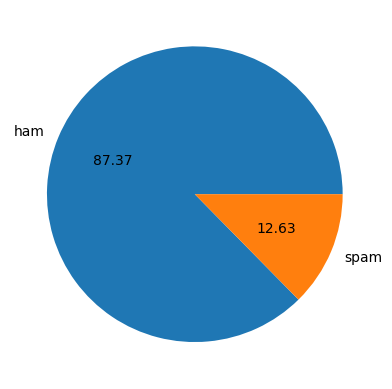

In [15]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show

#Data is imbalanced

In [27]:
import nltk

In [38]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to C:\Users\ANURAG
[nltk_data]     JAISWAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [39]:
df['num_characters']=df['text'].apply(len) #count no of characetrs in sms

In [40]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) #count no of word in sms


In [44]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [48]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))# count no of sentences in sms


In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [52]:
df[df['target']==0][["num_characters","num_words","num_sentences"]].describe() #for ham messages charcters

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
df[df['target']==1][["num_characters","num_words","num_sentences"]].describe() #for spam messages charcters


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#As we can see Spam messages are generally bigger than ham

In [55]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

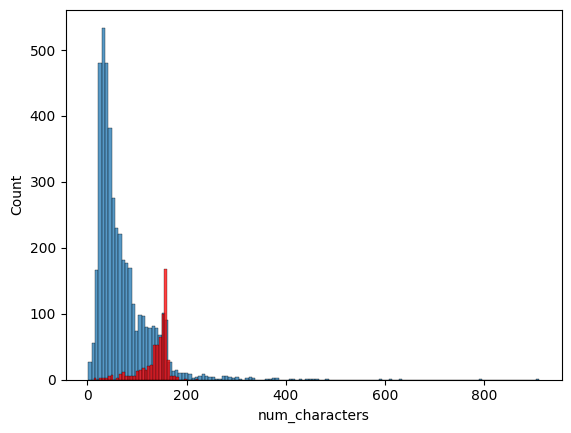

In [59]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

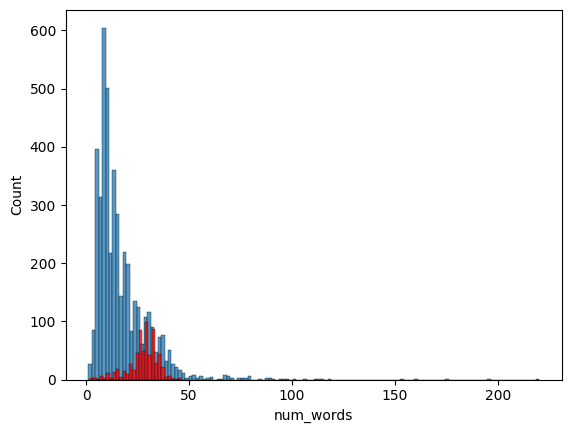

In [60]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [ ]:
#We can see most of the spam messages have more words and characters in general


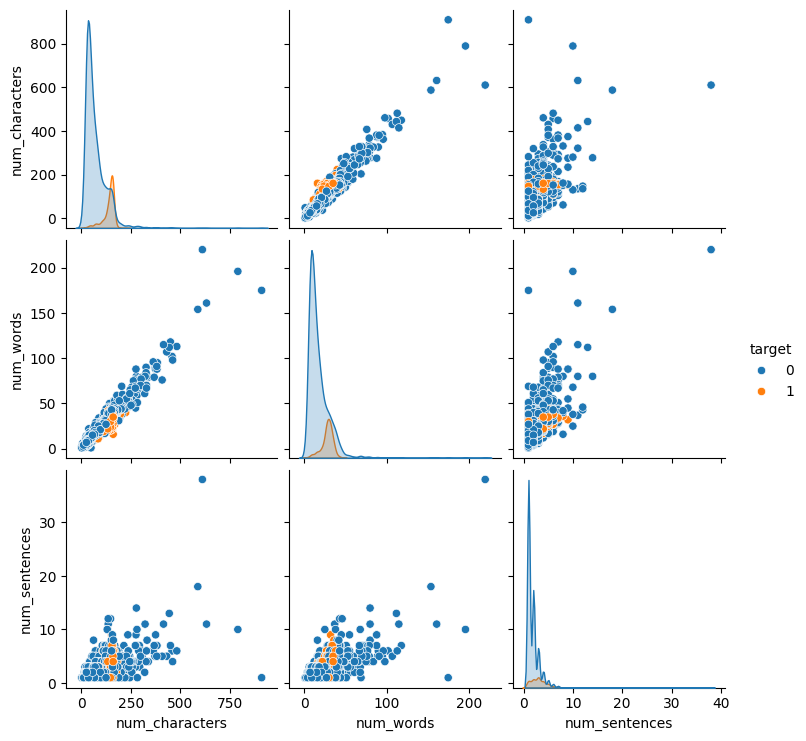

In [61]:
sns.pairplot(df,hue='target')

<Axes: >

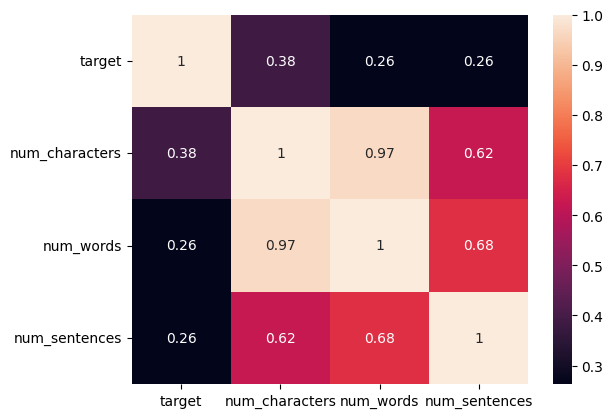

In [67]:
#now making correlation since there are some outliers in our data
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True) # it will show the probability of spam messages  with respect no num OF charcters words and sentences

In [ ]:
#since we can see num of charcters has highest correaltion with spam with probablity of 0.38 we will consider this for our model training

## 3.Data Preprocessing
Lower case
Tokenization
Removing special charcters
Removing stop words and punctuation
Stemming

In [81]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\ANURAG
[nltk_data]     JAISWAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [82]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [85]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [93]:
transform_text("Hi I'm Anurag Jaiswal 19 yr old got 90 % in boards")

'hi anurag jaiswal 19 yr old got 90 board'

In [94]:
transform_text("Did you like my project on ml?")

'like project ml'

In [95]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Loving")

'love'

In [96]:
transform_text('I loved the YT lectures on ML. How about You?')

'love yt lectur ml'

In [105]:
df["transformed_text"]=df['text'].apply(transform_text)

In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [107]:
from wordcloud import WordCloud

In [110]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [111]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

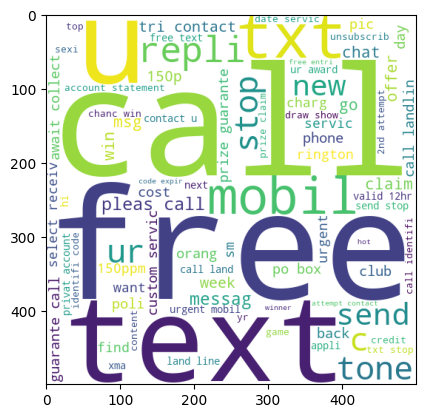

In [112]:
plt.imshow(spam_wc)

In [113]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

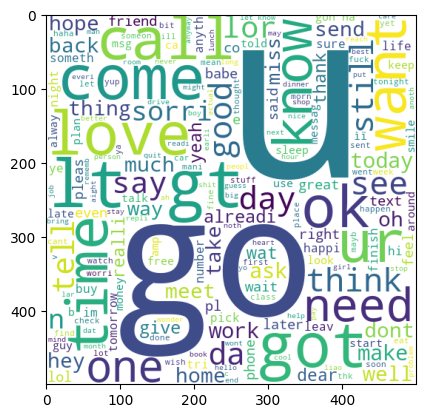

In [114]:
plt.imshow(ham_wc)

In [115]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [117]:
#Finfing the word which is use mostly in Spam messages
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [118]:
len(spam_corpus)

9939

In [119]:
from collections import Counter


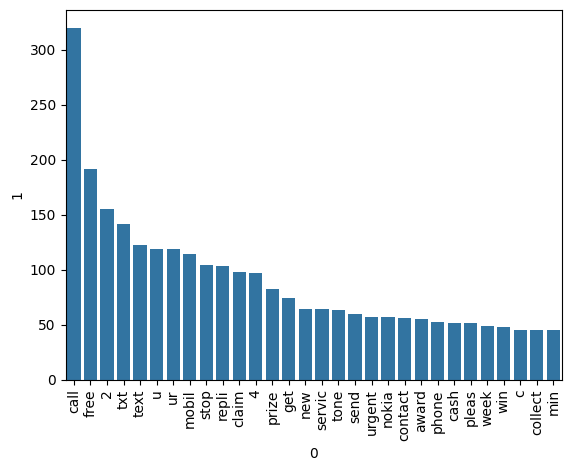

In [124]:
spam_corpus_counter = Counter(spam_corpus).most_common(30)
df_spam = pd.DataFrame(spam_corpus_counter)

sns.barplot(x=df_spam[0], y=df_spam[1])

plt.xticks(rotation="vertical")
plt.show()

In [125]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:
len(ham_corpus)

35404

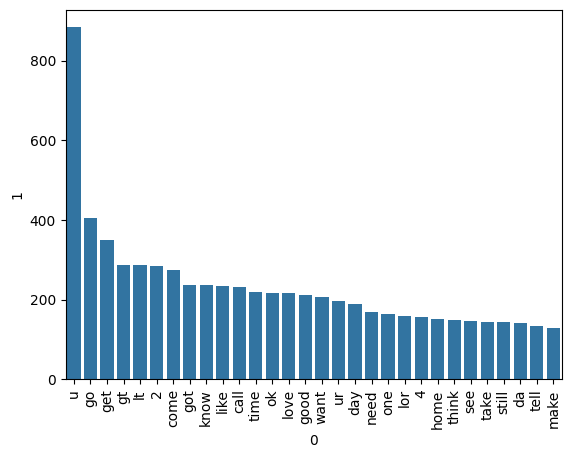

In [127]:
ham_corpus_counter = Counter(ham_corpus).most_common(30)
df_ham = pd.DataFrame(ham_corpus_counter)

sns.barplot(x=df_ham[0], y=df_ham[1])

plt.xticks(rotation="vertical")
plt.show()

##4. Model Building 


In [142]:
#we will first build naive based model because it is best suitable for text data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [143]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [144]:
X.shape

(5169, 6708)

In [145]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [150]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('For GaussianNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred1))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred1))
print("Precision Score:",precision_score(y_test,y_pred1))


For GaussianNB:-
Accuracy Score: 0.8762088974854932
Confusion Matrix: [[793 103]
 [ 25 113]]
Precision Score: 0.5231481481481481


In [151]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('For MultinomialNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred2))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred2))
print("Precision Score:",precision_score(y_test,y_pred2))

For MultinomialNB:-
Accuracy Score: 0.9593810444874274
Confusion Matrix: [[896   0]
 [ 42  96]]
Precision Score: 1.0


In [152]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('For BernoulliNB:-')
print("Accuracy Score:",accuracy_score(y_test,y_pred3))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred3))
print("Precision Score:",precision_score(y_test,y_pred3))

For BernoulliNB:-
Accuracy Score: 0.9700193423597679
Confusion Matrix: [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


#Now precision score for MNB is 1 this will be selected for our model
#Data is imbalance so accuracy is less reliable 
#tfidf has been use because from Count Vectroized precision was less